# Evaluación
Notebook (20 puntos): El notebook debe ser un reporte con la estrategia analítica, explicando los siguientes puntos:
* La definición de los requerimientos, la definición del vector objetivo, la definición de las métricas a utilizar.(3 puntos)
* Un análisis exploratorio (univariado y gráfico). Como mínimo, debe analizar el comportamiento del vector objetivo antes del preprocesamiento y posterior al procesamiento.(5 puntos)
* La estrategia de preprocesamiento/feature engineering.(2 puntos)
* La elección de los algoritmos a implementar, así como sus hiperparámetros. Un reporte sobre qué modelos enviarán a competencia. (10 puntos)

Modelos serializados:
* Los modelos deben estar serializados con la siguiente nomenclatura: nombre_grupomodelo-1 y nombre_grupo-modelo-2.

La evaluación de los modelos serializados se realizará en función al desempeño predictivo del modelo en un conjunto de datos externos.

La primera instancia es evaluar los dos modelos enviados a competencia por el grupo, preservando el mejor modelo para la competencia con los otros grupos.

El segundo paso es rankear según desempeño entre grupos.

### Problema: Predecir si un procedimiento policial resultará en arresto y en acción violenta .
### Base de datos del departamento de policía de New York (datos 2009 conjunto de entrenamiento y 2010 de pruebas): stop_and_frisk_data.csv con información sobre detenciones e interrogaciones.
### Diccionario de atributos: 2009 SQF File Spec.xlsx
### Objetivo general:Generar un modelo predictivo que condicional a las características medidas del sospechoso, prediga si un determinado procedimiento concluirá en un arresto o no y en una acción violenta o no.
 
# Objetivos
1. Dado la gran cantidad de atributos, se le entrega un script preproc_nyc_sqf.py que normaliza la cantidad de atributos. Haga uso de la función create_suitable_dataframe para igualar el benchmark de los atributos.
2. Debe analizar de forma exploratoria los atributos. Reporte la cantidad de datos perdidos y presente su esquema de recodificación.
3. Generar un modelo predictivo que condicional a las características medidas del sospechoso, prediga si un determinado procedimiento concluirá en un arresto o no. Para ello, guíase por los siguentes lineamientos:
    * Entrene por lo menos 1 modelo que sea capaz de predecir si se producirá un arresto o no. Una vez que encuentre un modelo satisfactorio, reporte al menos dos métricas de desempeño.
    * Refine aquellos atributos relevantes. Encuentre por lo menos 30 atributos que explique la importancia relativa y ordénelos por orden de importancia.
    * Finalmente, reporte la probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y condicional a la raza.
4. Genere al menos cinco modelos predictivos que permitan determinar si el procedimiento policial concluirá en alguna acción violenta.
    * Para ello, debe generar un nuevo atributo como vector objetivo que indique cuándo hubo violencia o no. Éste debe ser creado a partir de atributos existentes que indiquen el tipo de violencia. El detalle de los atributos que se consideran violentos se detalla a continuación: 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other'
5. Seleccione los 2 mejores modelos, serialicelos y envíelos a evaluación. Recuerde que el modelo serializado debe ser posterior al fit , para poder ejecutar predict en los nuevos datos.
6. La evaluación del modelo será realizada en función a un conjunto de datos reservados al cual no tienen acceso.

# Preliminares
Descripción del problema y objetivos, cómo implementarán su solución. Debe considerar qué criterios de optimización y métricas de desempeño considerará.

Descripción del problema: el desarrollo de un modelo predictivo sobre la probabilidad de que un procedimiento policial resulte en un arresto y en una acción violenta en base a una serie de atributos con información sobre detenciones e interrogaciones. Por lo que este problema corresponde a uno del tipo de clasificación donde se busca esclarecer sobre los efectos que tienen los atributos en cómo se desenvuelve el procedimiento: termina en arresto o no, resulta en una acción violenta o no.

Objetivo: predecir la variable "artsmade" de si terminó o no en detención y una nueva variable "violence" que indica si terminó en acción violenta o no.

Modo de implementar solución: Revisaré la base de datos primeramente, la limpiaré y recodificaré acorde a lo indicado en el enunciado, generaré columnas dummy para poder utilizar las variables cualitativas en el modelado. Una vez tenga mi base de datos auxiliar lista, verificaré que variables son más relevantes para determinar los vectores objetivos mediante revisión gráfica. Con las más relevantes generaré los 5 modelos predictivos solicitados en el enunciado, y verificaré las métricas de los modelos para su validación y comparación respecto a Precision , Recall y F1. 
Los modelos que consideraré son: Regresión Logística, Random Forest, Adaptive Boosting, Gradient Boosting, SVC, BernoulliNB, MultinomialNB y puede que ocupe NN. A medida que vaya avanzando en las secciones de la prueba voy a ir indicando con que modelos voy quedando y por qué. Para la selección de los parámetros de los modelos utilizare gridsearch 


# Aspectos computacionales
Descripción de las librerías y módulos a implementar, así como las funciones generadas y su objetivo.
El tipo de métricas a implementar, ¿Qué estrategia de división de muestras?, ¿Qué tipo de preprocesamiento se implementará?. Se deben declarar por lo menos cinco modelos con una grilla de hiperparámetros tentativa.

Para poder dearrollar este enunciado voy a necesitar importar librerias que me permitan trabajar con Dataframes y hacer manipulación y análisis de datos, por ello importo pandas y numpy. También voy a querer verificar gráficamente algunos resultados, por lo cual importo seaborn, matplotlib y missingno. Como el objeto del enunciado es generar un modelo que permita predecir la variable objetivo, necesito acceder a la libreria de aprendizaje de máquinas de sklearn. Y finalmente quiero ignorar los warnings, por lo que importo warnings.

In [1]:
import pandas as pd # manejo de bases de datos
import numpy as np # operaciones de cálculo
import matplotlib.pyplot as plt # manejo de gráficos
import seaborn as sns #visualización datos estadísticos
import missingno as msngo #visualización de valores perdidos
import warnings #manejo de warnings
warnings.filterwarnings("ignore")
#Metodos para trabajar con aprendizaje de máquinas:
from sklearn.model_selection import train_test_split, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
#Métodos para trabajar con RN (puede que utilice o no)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adadelta
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adadelta
from keras.utils import plot_model
plt.style.use('seaborn') # Gráficos estilo seaborn
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Método para hacer dump del modelo y objetos
import pickle
import preproc_nyc_sqf2 as preproc

Using TensorFlow backend.


In [2]:
def plot_classification_report(y_true, y_hat):
    """
    plot_classification_report: Genera una visualización de los puntajes reportados con la función `sklearn.metrics.classification_report`.

    Parámetros de ingreso:
        - y_true: Un vector objetivo de validación.
        - y_hat: Un vector objetivo estimado en función a la matriz de atributos de validación y un modelo entrenado.

    Retorno:
        - Un gráfico generado con matplotlib.pyplot

    """
    # process string and store in a list
    report = classification_report(y_true, y_hat).split()
    # keep values
    report2 = [i for i in report if i not in ['precision', 'recall', 'f1-score', 'support', 'avg']]
    # transfer to a DataFrame
    report3 = pd.DataFrame(np.array(report2)[:10].reshape(2, 5))
    # asign columns labels
    report3.columns = ['idx', 'prec', 'rec', 'f1', 'n']
    # preserve class labels
    class_labels = report3.iloc[:np.unique(y_true).shape[0]].pop('idx').apply(int)
    # separate values
    class_report = report3.iloc[:np.unique(y_true).shape[0], 1:4]
    # convert from str to float
    class_report = class_report.applymap(float)
    # convert to float average report
    average_report = report3.iloc[-1, 1: 4].apply(float)
    colors = ['dodgerblue', 'tomato', 'purple', 'orange']
    for i in class_labels:
        plt.scatter(class_report['prec'][i], [1], marker='x', color=colors[i])
        plt.scatter(class_report['rec'][i], [2], marker='x', color=colors[i])
        plt.scatter(class_report['f1'][i], [3], marker='x',color=colors[i], label=f'Class: {i}')
    plt.scatter(average_report, [1, 2, 3], marker='o', color='forestgreen', label='Avg')
    plt.yticks([1.0, 2.0, 3.0], ['Precision', 'Recall', 'f1-Score'])


# Análisis Exploratorio
Análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento (datos perdidos, recodificaciones).
Se debe analizar el comportamiento del vector objetivo.
Se debe reportar el patrón de datos perdidos.
Se debe implementar recodificaciones para el vector objetivo.
Definir el tipo de modelo a implementar para generar una predicción de arresto, así como su grilla de hiperparámetros.
Definir la recodificación del vector objetivo para generar una predicción de acción violenta
en el procedimiento.
Implementar el script preproc_nyc_sqf.py para igualar la cantidad de atributos en el benchmark.


In [3]:
# Datos para el entrenamiento
df_train = pd.read_csv('2009_1perc.csv').drop(columns='Unnamed: 0')
# Datos para la validación
df_test = pd.read_csv('2010_1perc.csv').drop(columns='Unnamed: 0')

In [4]:
#Revisemos los datos de entrenamiento
print(df_train.info())
print(df_train.head())
print("Columnas:", df_train.columns)
print("Estadísticas de variables numéricas:",df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 111 entries, year to detailcm
dtypes: float64(1), int64(18), object(92)
memory usage: 4.9+ MB
None
   year  pct  ser_num  datestop  timestop recstat inout trhsloc  perobs  \
0  2009   41     1779   4032009       130       A     O       P     1.0   
1  2009  108     5805  10292009      1050       A     O       P     3.0   
2  2009   43     8340  10062009      1450       1     O       P     1.0   
3  2009   77      932   1232009      1843       A     O       P     5.0   
4  2009  110    11224  12132009      1655       A     O       P     3.0   

  crimsusp  ...  zip addrpct sector beat post   xcoord   ycoord dettypcm  \
0      CPW  ...           41      G    7       1013067  0238633       CM   
1     BURG  ...          108      J            1012043  0212157       CM   
2     MISD  ...           43      E            1017599  0240200       CM   
3      MIS  ...           77      J    4   35  1002625  0183442

In [5]:
#Revisemos los datos de prueba
print(df_test.info())
print(df_test.head())
print("Columnas:", df_test.columns)
print("Estadísticas de variables numéricas:",df_test.describe())
#dado que de .info no hay nulos, pero de .head se aprecia que hay valores " " vamos a reemplazar los valores con espacios por nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 111 entries, year to detailcm
dtypes: int64(16), object(95)
memory usage: 5.1+ MB
None
   year  pct  ser_num  datestop  timestop recstat inout trhsloc  perobs  \
0  2010    6      487   1192010      1420       1     O       P       2   
1  2010   42     7138   9042010       225       1     I       T      10   
2  2010   33     2628   6302010      1240       1     I       T       5   
3  2010  108     6384  11172010      2338       1     O       P       3   
4  2010   14     2295   3072010      2240       1     I       T       5   

    crimsusp  ...  zip addrpct sector beat post   xcoord  ycoord dettypcm  \
0        FEL  ...            6      G        38   983543  208767       CM   
1     FELONY  ...           42      E            1014172  241737       CM   
2    ROBBERY  ...           33      B    6       1000916  245710       CM   
3       CSCS  ...          108      J            1012612  212240       

Las bases de datos de entrenamiento (2009) y prueba (2010) tienen 111 columnas entre las cuales se encuentra el vector objetivo artsmade. Para el entrenamiento se tiene 5812 registros y para prueba 6013 (proporción 49 y 51%).
Entre los atributos se puede apreciar que hay variables de tipo numericas float e int, y objetos con texto.

In [6]:
df_train.shape[1]

111

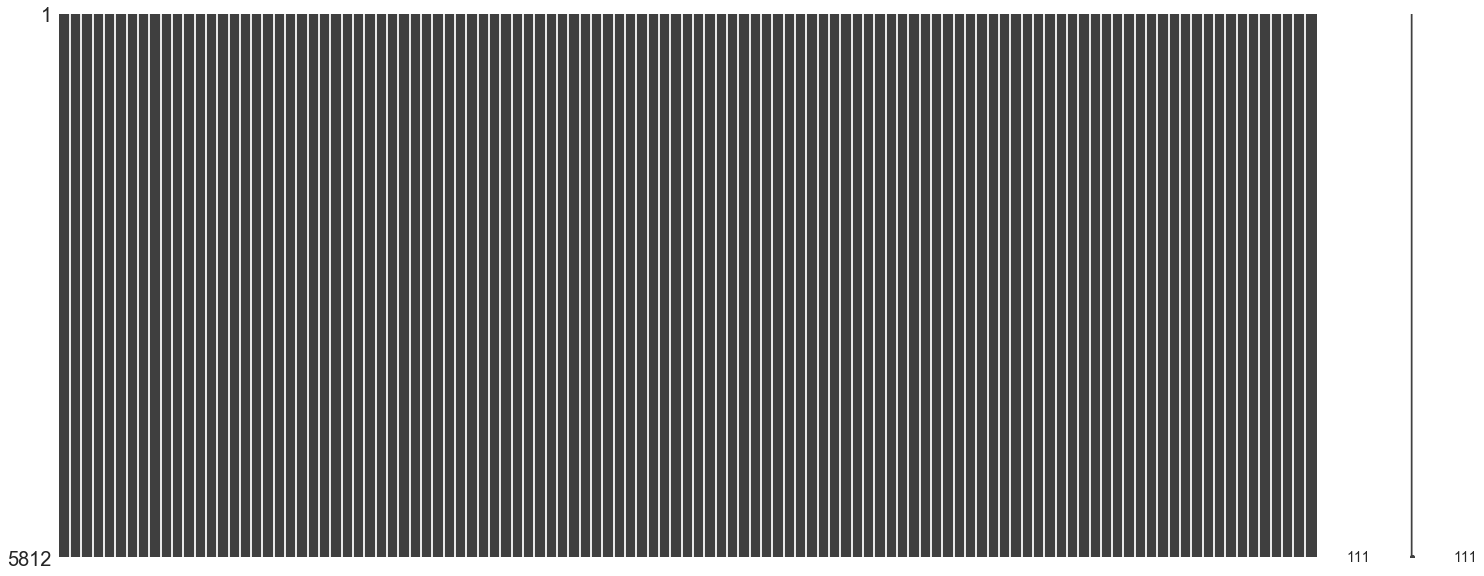

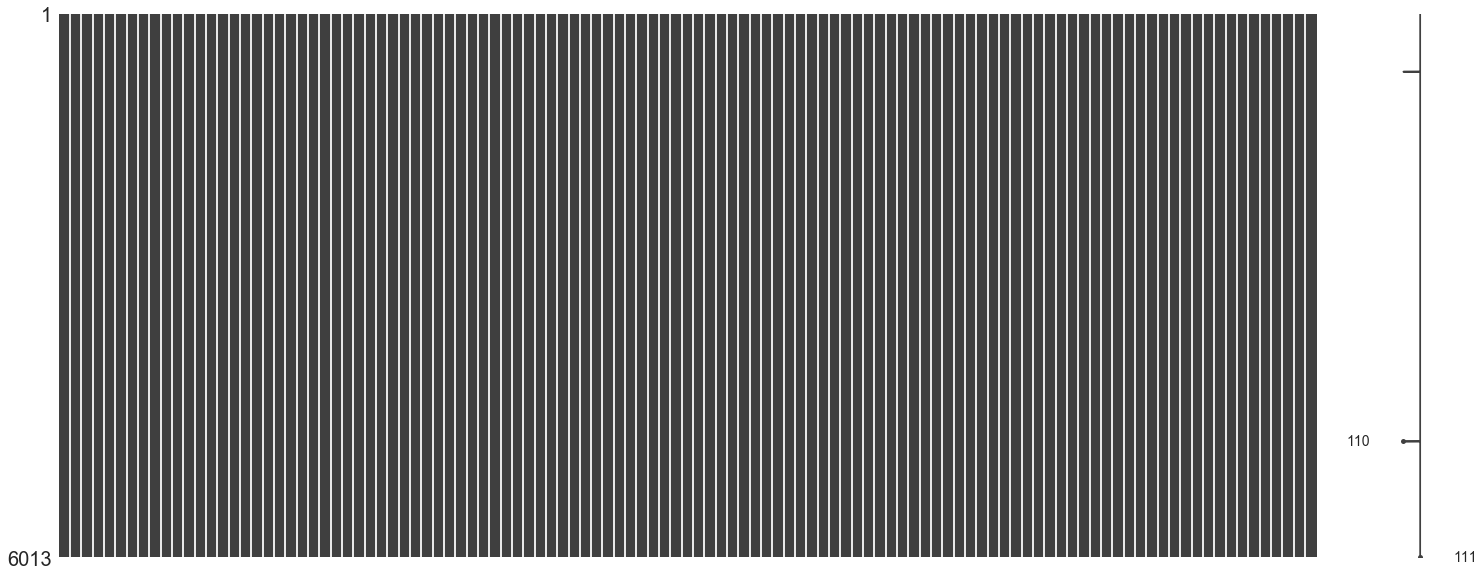

In [7]:
# Revisamos datos perdidos
msngo.matrix(df_train)
msngo.matrix(df_test)

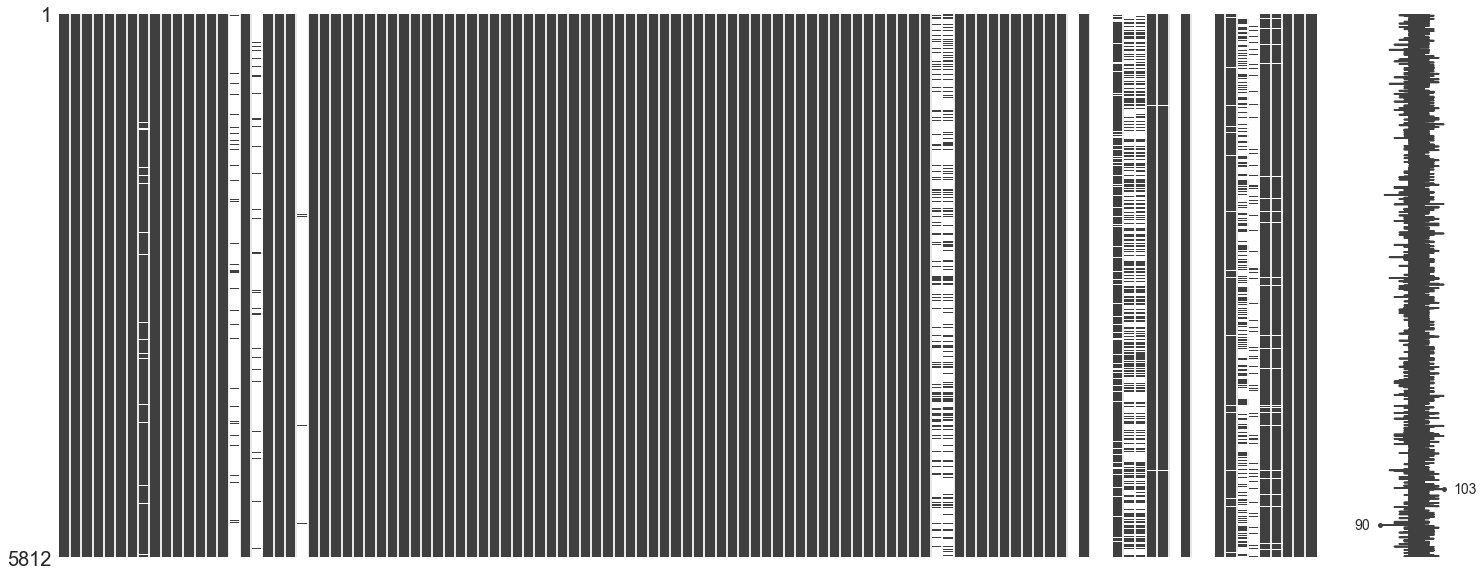

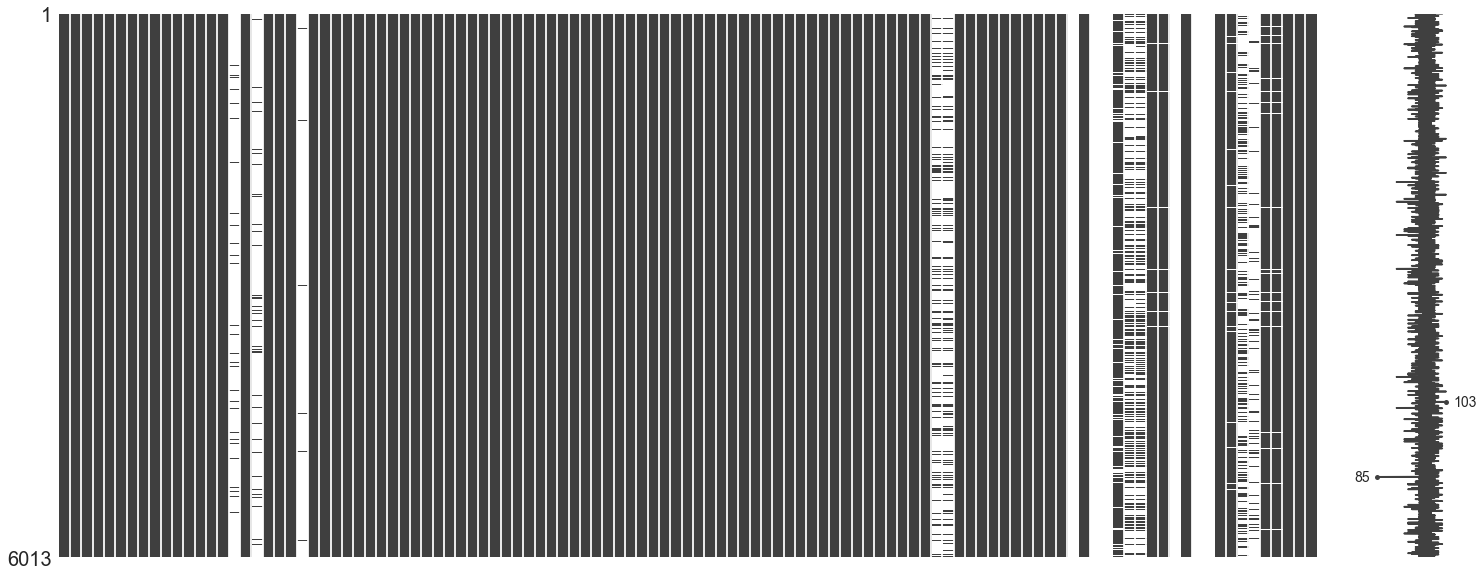

In [8]:
#se requiere preprocesar los valores " "
msngo.matrix(df_train.replace('', np.nan).replace(' ', np.nan))
msngo.matrix(df_test.replace('', np.nan).replace(' ', np.nan))

N    0.940124
Y    0.059876
Name: arstmade, dtype: float64


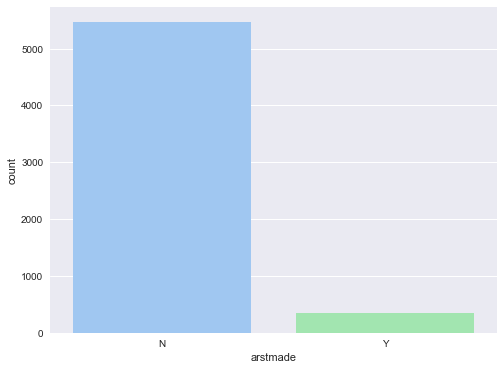

In [9]:
# Revisamos el desbalance de clases de nuestro vector objetivo
print(df_train.arstmade.value_counts('%'))
plt.figure(figsize=(8,6))
sns.countplot(x='arstmade', data=df_train)

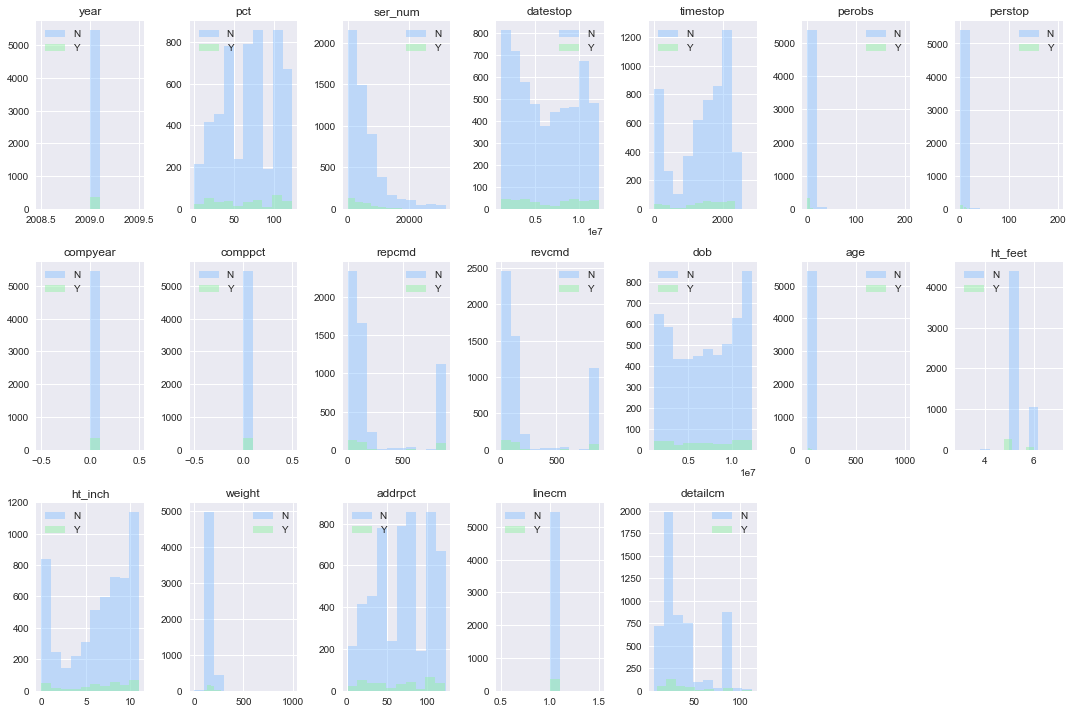

In [10]:
#revisemos los atributos numéricos
# Seleccionamos todos los atributos numericos
plt.figure(figsize=(15,60))
cols_num = df_train.drop(columns=['arstmade']).select_dtypes(exclude=['object']).columns
for i, (colname, serie) in enumerate(df_train.loc[:,cols_num].iteritems()):
    plt.subplot(18, np.ceil(df_train.shape[1]/18), i + 1)
    df_train.groupby('arstmade')[colname].plot(kind='hist', alpha=.5)
    plt.legend(df_train['arstmade'].unique())
    plt.title(colname, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.subplots_adjust(wspace=0.2)
    plt.tight_layout()


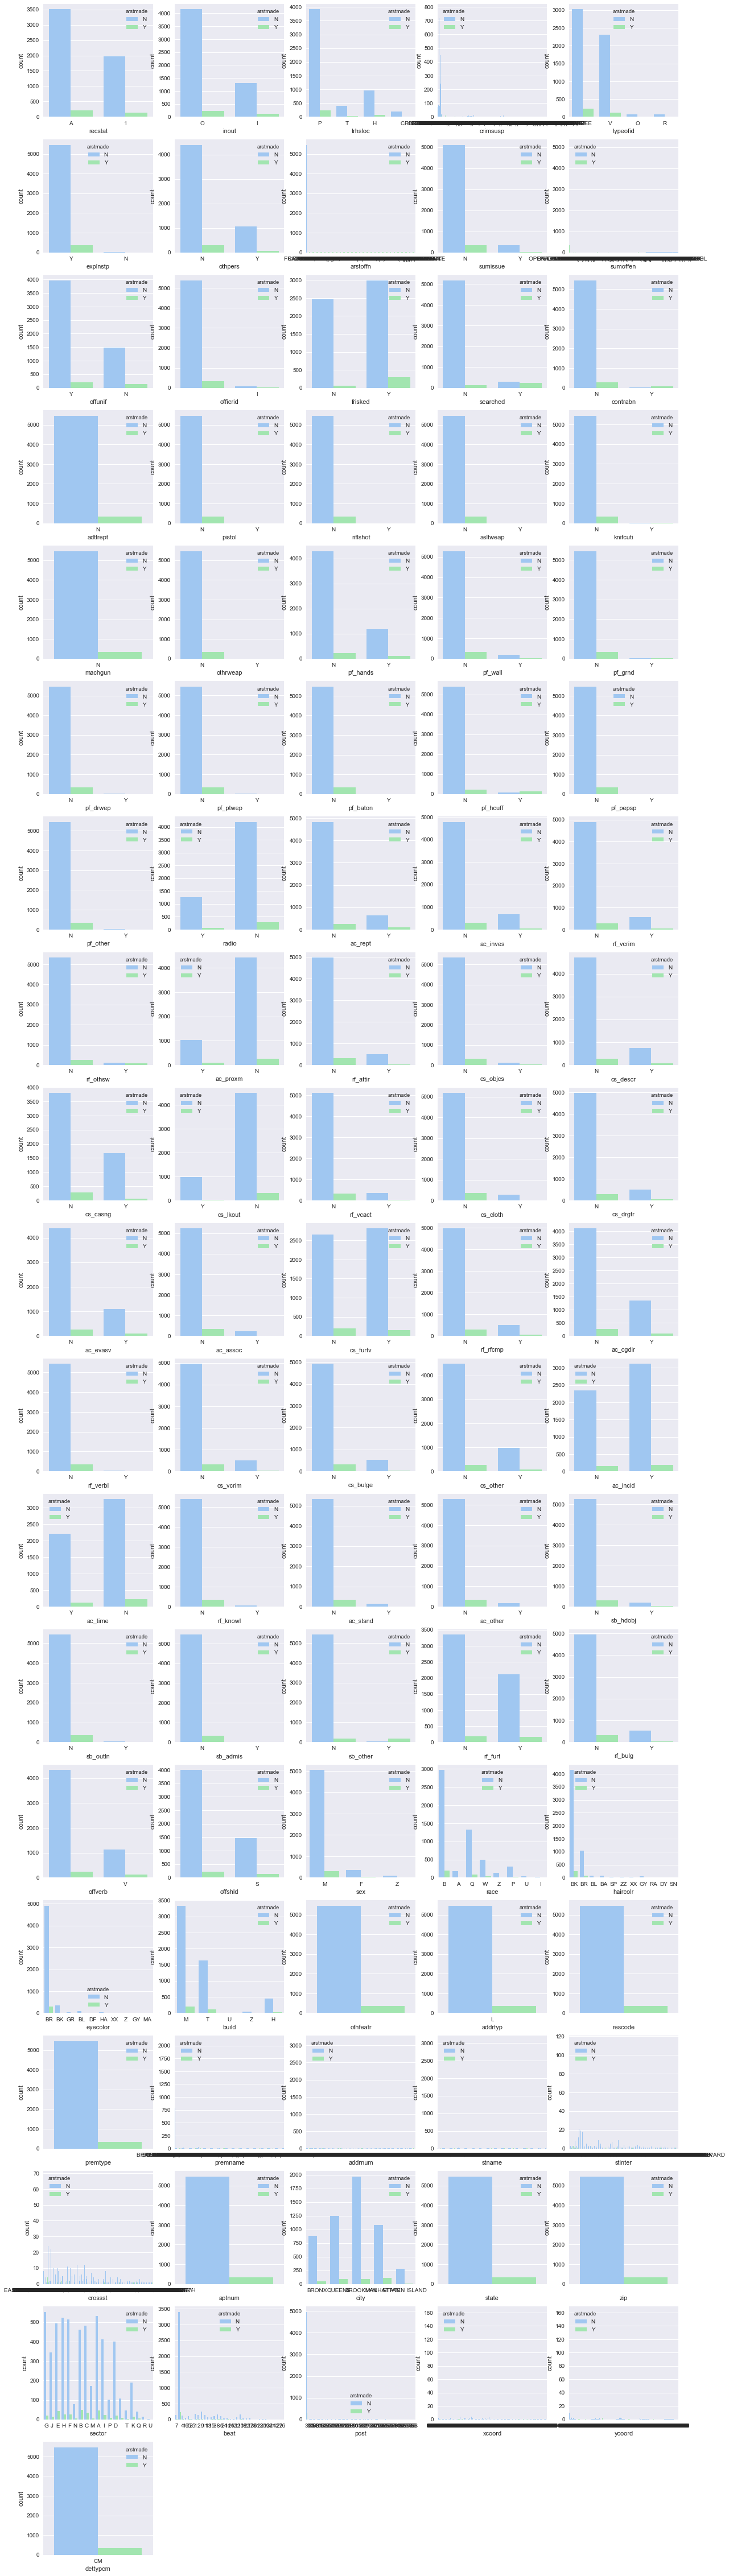

In [11]:
#atributos categóricos
# Generamos una grilla con los gráficos de distribución del resto de atributos.
plt.figure(figsize=(20,100))
# Seleccionamos todos los atributos categóricos
cols_cat = df_train.drop(columns=['arstmade']).select_dtypes(include=['object']).columns
col = 5
row = (df_train.shape[1]//col) + 1
# Recorremos el listado de atributos.
for index, (colname, serie) in enumerate(df_train.loc[:, cols_cat].iteritems()):
    plt.subplot(row, col, index+1)
    # Se usa un grafico de ocurrencias
    if serie.dtype == 'object':
        sns.countplot(x= colname, data=df_train, hue='arstmade')

Se puede apreciar que las variables tipo objeto algunas consideran 2 valores mientras que otras más de dos valores. Para poder trabajar con los modelos me interesa contar con matrices numéricas, por lo que requiero preprocesar las matrices de prueba y entrenamiento para obtener matrices con valores numericos y binarios.

# Feature Engineering

Se realizaron modificaciones a la función `create_suitable_dataframe`, ya que al momento de aplicarla a distintos DataFrames las columnas de atributos resultantes variaban y esto hace imposible poder procesar en las etapas de predicción Se incorporó el parámetro `force_object`, para indicarle a la función cuales columnas se forzarán a ser de tipo object y así evitar los problemas de la inferencia de tipos de datos.
* force_object: Se verifica en procesamientos de revisión que estas columnas en ocasiones se interpretan como numero y en otros caso como object, dependiendo si se incluyen valores vacíos. Para homologar la interpretación se fijan como object.
* force_delete: Se verifica en procesamientos de revisión que estas columnas presentam variaciones que no garantiza estabilidad de homologación del DataFrame, por ejemplo asltweap en el DataFrame de entrenamiento presenta 5811 registros con el valor N y 1 con el valor 1, esto es como tener una sóla clase y por ende se puede eliminar

In [12]:
force_object = ['addrpct', 'detailcm']
force_delete = ['asltweap', 'post']

In [13]:
# Se pre-procesa el DataFrame de entrenamiento
df_train, cat_col_train, num_col_train = preproc.create_suitable_dataframe(df_train,force_object = force_object, force_delete = force_delete)
# Se pre-procesa el DataFrame de validación
df_test, cat_col_test, num_col_test = preproc.create_suitable_dataframe(df_test,force_object = force_object, force_delete = force_delete)

In [14]:
print(df_train.shape)
print(df_test.shape)

(4636, 75)
(4747, 75)


In [15]:
if sum(df_train.columns == df_test.columns)==df_train.shape[1]==df_test.shape[1]:
    print("Los DataFrame tienen las mismas columnas")

Los DataFrame tienen las mismas columnas


In [16]:
#vamos a separar las matrices para los dos objetivos
# Caso 1, donde el vector objetivo es arstmade
df_train_1 = df_train.copy()
df_test_1=df_test.copy()
# Caso 2, donde el vector objetivo determinará si el procedimiento policial cloncluirá en una acción violenta.
df_train_2 = df_train.copy()
df_test_2=df_test.copy()

In [17]:
# Revisamos nuevamente el balance de la clase para determinar que clase asignamos valor 1
df_train_1['arstmade'].value_counts()

N    4355
Y     281
Name: arstmade, dtype: int64

In [18]:
# Vamos a nombrar un nuevo dataframe con el primer vector objetivo arstmade, con la clase Y=1
df_train_1['arstmade_bin'] = np.where(df_train_1['arstmade']=='Y', 1, 0)
# Eliminamos la columna original
df_train_1.drop(columns='arstmade', inplace=True)
df_test_1['arstmade_bin'] = np.where(df_test_1['arstmade']=='Y', 1, 0)
# Eliminamos la columna original
df_test_1.drop(columns='arstmade', inplace=True)
# Vamos a nombrar un nuevo dataframe con el primer vector objetivo arstmade, con la clase Y=1
df_train_2['arstmade_bin'] = np.where(df_train_2['arstmade']=='Y', 1, 0)
# Eliminamos la columna original
df_train_2.drop(columns='arstmade', inplace=True)
df_test_2['arstmade_bin'] = np.where(df_test_2['arstmade']=='Y', 1, 0)
# Eliminamos la columna original
df_test_2.drop(columns='arstmade', inplace=True)

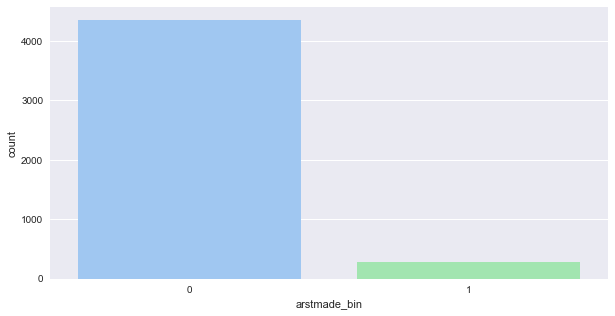

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(df_train_1['arstmade_bin'])

In [20]:
# Mantenemos la estructura de datos
print(df_train_1.shape)
print(df_test.shape)
print(df_train_2.shape)
print(df_test_2.shape)

(4636, 75)
(4747, 75)
(4636, 75)
(4747, 75)


Para predicir si termina en violencia se consideran los atributos que implican fuerza física: 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other' y se traduciran a 1 atributo que represente el vector objetivo como physical_force.

In [21]:
#preprocesamiento para los datos que implian fuerza física
df_train_2['physical_force'] = pd.get_dummies(df_train_2.filter(regex='pf_'), drop_first=True).sum(axis=1) 
df_train_2['physical_force'] = np.where(df_train_2['physical_force']==0, 0, 1)

# Se elimanan columnas originales
df_train_2.drop(columns=df_train_2.filter(regex='pf_').columns, inplace=True)

df_test_2['physical_force'] = pd.get_dummies(df_test_2.filter(regex='pf_'), drop_first=True).sum(axis=1) 
df_test_2['physical_force'] = np.where(df_test_2['physical_force']==0, 0, 1)

# Se elimanan columnas originales
df_test_2.drop(columns=df_test_2.filter(regex='pf_').columns, inplace=True)

print(df_train_2.shape)
print(df_test_2.shape)

(4636, 67)
(4747, 67)


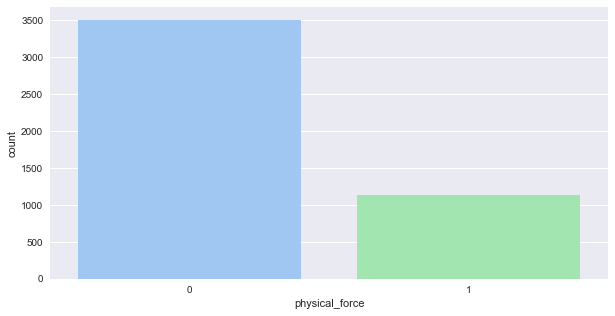

In [22]:
#veamos nuestro vector objetivo de si termina el procedimiento con violencia
plt.figure(figsize=(10, 5))
sns.countplot(df_train_2['physical_force'])

In [23]:
#ahora vamos a pasar todas las matrices a numérico para poder aplicar los modelos
df_1 = df_train_1.copy()
df_2 = df_train_2.copy()
df_1t=df_test_1.copy()
df_2t=df_test_2.copy()

In [24]:
#para pasar a numericos los objetos con value_counts<=2
objetosdf1=[]
objetosdf2=[]
for colname, serie in df_1.iteritems():
    if (serie.dtype == "object") and (len(df_1[colname].value_counts())<=2): objetosdf1.append(colname) 
print(objetosdf1)
for colname, serie in df_2.iteritems():
    if (serie.dtype == "object") and (len(df_2[colname].value_counts())<=2): objetosdf2.append(colname) 
print(objetosdf2)

['recstat', 'inout', 'explnstp', 'othpers', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld']
['recstat', 'inout', 'explnstp', 'othpers', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'knifcuti', 'othrweap', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth',

In [25]:
df1= pd.get_dummies(df_1,columns=objetosdf1,drop_first=True) 
df2= pd.get_dummies(df_2,columns=objetosdf2,drop_first=True) 
df1t= pd.get_dummies(df_1t,columns=objetosdf1,drop_first=True) 
df2t= pd.get_dummies(df_2t,columns=objetosdf2,drop_first=True) 
print(df_1.shape, df_1t.shape)
print(df_2.shape, df_2t.shape)
print(df1.shape, df1t.shape)
print(df2.shape, df2t.shape)

(4636, 75) (4747, 75)
(4636, 67) (4747, 67)
(4636, 75) (4747, 75)
(4636, 67) (4747, 67)


In [26]:
#para pasar a numericos los objetos con value_counts>2
objetosdf1m=[]
objetosdf2m=[]
for colname, serie in df1.iteritems():
    if (serie.dtype == "object") and (len(df1[colname].value_counts())>2): 
        objetosdf1m.append(colname) 
        #print(df_1[colname].value_counts(), df_1t[colname].value_counts())
print(objetosdf1m)
for colname, serie in df2.iteritems():
    if (serie.dtype == "object") and (len(df2[colname].value_counts())>2): 
        objetosdf2m.append(colname) 
        #print(df_2[colname].value_counts(), df_2t[colname].value_counts())
print(objetosdf2m)

['trhsloc', 'typeofid', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat']
['trhsloc', 'typeofid', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat']


In [27]:
#voy a asegurarme de mantener los tamaños de las matrices de prueba y entrenamiento iguales entre si manualmente
for colname in objetosdf1m:
    if (df1[colname].unique().all())==(df1t[colname].unique().all()):
        for value in df1[colname].unique():
            df1[colname+"_"+value] = np.where(df1[colname]==value, 1, 0)
            df1t[colname+"_"+value] = np.where(df1t[colname]==value, 1, 0)
        df1.drop(columns=colname, inplace=True)
        df1t.drop(columns=colname, inplace=True)
        objetosdf1m.remove(colname)
print(df1.shape, df1t.shape)

(4636, 86) (4747, 86)


In [28]:
while objetosdf1m != []:
    for colname in objetosdf1m:
        if (df1[colname].unique().all())!=(df1t[colname].unique().all()):
                unique_list=[]
                for x1 in df1[colname].unique(): 
                    if x1 not in unique_list: 
                        unique_list.append(x1)
                for x2 in df1t[colname].unique():
                    if x2 not in unique_list:
                            unique_list.append(x2)
                #print(unique_list)
                for value in unique_list:
                    df1[colname+"_"+value] = np.where(df1[colname]==value, 1, 0)
                    df1t[colname+"_"+value] = np.where(df1t[colname]==value, 1, 0)
                df1.drop(columns=colname, inplace=True)
                df1t.drop(columns=colname, inplace=True)
                objetosdf1m.remove(colname)
                print(objetosdf1m)

['typeofid', 'sex', 'haircolr', 'eyecolor', 'city', 'sector', 'beat']
['typeofid', 'haircolr', 'eyecolor', 'city', 'sector', 'beat']
['typeofid', 'haircolr', 'city', 'sector', 'beat']
['typeofid', 'haircolr', 'city', 'beat']
['haircolr', 'city', 'beat']
['haircolr', 'beat']
['beat']
[]


In [29]:
print(df1.shape, df1t.shape)

(4636, 198) (4747, 198)


In [30]:
#voy a asegurarme de mantener los tamaños de las matrices de prueba y entrenamiento iguales entre si manualmente
for colname in objetosdf2m:
    if (df2[colname].unique().all())==(df2t[colname].unique().all()):
        for value in df2[colname].unique():
            df2[colname+"_"+value] = np.where(df2[colname]==value, 1, 0)
            df2t[colname+"_"+value] = np.where(df2t[colname]==value, 1, 0)
        df2.drop(columns=colname, inplace=True)
        df2t.drop(columns=colname, inplace=True)
        objetosdf2m.remove(colname)
print(df2.shape, df2t.shape)

(4636, 78) (4747, 78)


In [31]:
while objetosdf2m != []:
    for colname in objetosdf2m:
        if (df2[colname].unique().all())!=(df2t[colname].unique().all()):
            unique_list=[]
            for x1 in df2[colname].unique(): 
                if x1 not in unique_list: 
                    unique_list.append(x1)
            for x2 in df2t[colname].unique():
                if x2 not in unique_list:
                        unique_list.append(x2)
            #print(unique_list)
            for value in unique_list:
                df2[colname+"_"+value] = np.where(df2[colname]==value, 1, 0)
                df2t[colname+"_"+value] = np.where(df2t[colname]==value, 1, 0)
            df2.drop(columns=colname, inplace=True)
            df2t.drop(columns=colname, inplace=True)
            objetosdf2m.remove(colname)
            print(objetosdf2m)
print(df2.shape, df2t.shape)

['typeofid', 'sex', 'haircolr', 'eyecolor', 'city', 'sector', 'beat']
['typeofid', 'haircolr', 'eyecolor', 'city', 'sector', 'beat']
['typeofid', 'haircolr', 'city', 'sector', 'beat']
['typeofid', 'haircolr', 'city', 'beat']
['haircolr', 'city', 'beat']
['haircolr', 'beat']
['beat']
[]
(4636, 190) (4747, 190)


Al fin tengo matrices numericas para prevenir errores en la siguiente sección

# Modelación
Solución analítica que aumente las métricas de desempeño. Se solicitan por lo menos 5 modelos predictivos. Cada modelo predictivo debe tener una reseña sobre el por qué se diseño de esa forma.


In [32]:
import time #para comparar los tiempos de ejecución de los modelos

### Modelo (arstmade)

En este caso se pide 1 modelo que prediga si un determinado procedimiento concluirá en un arresto o no.

Los hiperparámetros del modelo será calibrado mediante búsqueda de grilla considerándo parámetros utilizados en los desafíos del curso.

0    0.939387
1    0.060613
Name: arstmade_bin, dtype: float64


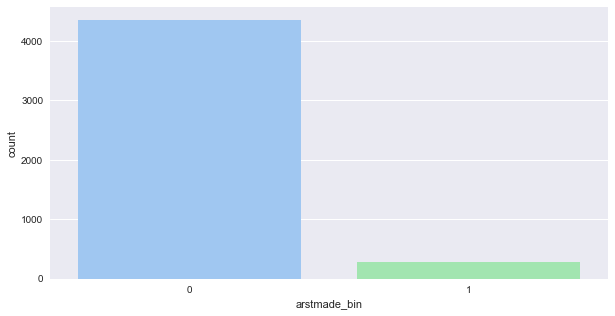

In [33]:
#revisemos nuevamente nuestro objetivo
plt.figure(figsize=(10, 5))
print(df1['arstmade_bin'].value_counts("%"))
sns.countplot(df1['arstmade_bin'])

Se puede apreciar que los clasificadores de la clase 1 pueden resultar con metricas de desepeño bajas debido al desbalance de clases

In [34]:
y_train=df1["arstmade_bin"]
X_train=df1.drop(columns="arstmade_bin")
y_test=df1t["arstmade_bin"]
X_test=df1t.drop(columns="arstmade_bin")

In [35]:
#Regresión logística
start = time.time()
log_model=LogisticRegression(random_state=1234).fit(X_train,y_train)
log_hat=log_model.predict(X_test)
end = time.time()
print("tiempo de procesamiento: ", end-start)
print(classification_report(y_test,log_hat))

tiempo de procesamiento:  0.26120996475219727
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.83      0.57      0.68       309

    accuracy                           0.96      4747
   macro avg       0.90      0.78      0.83      4747
weighted avg       0.96      0.96      0.96      4747



In [36]:
#Random Forest n_estimators = range(20, 1000, 50) max_features="auto"
from sklearn.model_selection import RandomizedSearchCV
start = time.time()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1000, num = 50)]
max_features = ["auto"]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               }
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, random_state=1234, n_jobs = -1).fit(X_train, y_train)
end = time.time()
y_hat_rf = rf_random.predict(X_test)
print("tiempo de procesamiento: ", end-start)
print(rf_random.best_params_)
print(classification_report(y_test, y_hat_rf))

tiempo de procesamiento:  48.46321225166321
{'n_estimators': 280, 'max_features': 'auto'}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.88      0.54      0.67       309

    accuracy                           0.97      4747
   macro avg       0.92      0.77      0.83      4747
weighted avg       0.96      0.97      0.96      4747



In [37]:
#Adaptive Boosting
start = time.time()
param_grid_ab = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]} 
ab_grid = GridSearchCV(AdaBoostClassifier(),param_grid = param_grid_ab,cv=5,n_jobs=-1).fit(X_train, y_train)
end = time.time()
y_hat_ab = ab_grid.best_estimator_.predict(X_test)
print("tiempo de procesamiento: ", end-start)
print(ab_grid.best_params_)
print(classification_report(y_test, y_hat_ab))

tiempo de procesamiento:  342.2962739467621
{'learning_rate': 0.1, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.84      0.54      0.66       309

    accuracy                           0.96      4747
   macro avg       0.91      0.77      0.82      4747
weighted avg       0.96      0.96      0.96      4747



In [38]:
#Gradient Boosting
start = time.time()
param_grid_gb = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]} 
gb_grid = GridSearchCV(GradientBoostingClassifier(),param_grid = param_grid_gb,cv=5,n_jobs=-1).fit(X_train, y_train)
end = time.time()
y_hat_gb = gb_grid.best_estimator_.predict(X_test)
print("tiempo de procesamiento: ", end-start)
print(gb_grid.best_params_)
print(classification_report(y_test, y_hat_gb))

tiempo de procesamiento:  353.24004793167114
{'learning_rate': 0.01, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4438
           1       0.85      0.64      0.73       309

    accuracy                           0.97      4747
   macro avg       0.91      0.81      0.86      4747
weighted avg       0.97      0.97      0.97      4747



In [39]:
#BernoulliNB
start = time.time()
ber_model = BernoulliNB().fit(X_train, y_train)
ber_class_pred = ber_model.predict(X_test)
end = time.time()
print("tiempo de procesamiento: ", end-start)
print(classification_report(y_test,ber_class_pred))

tiempo de procesamiento:  0.1859886646270752
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4438
           1       0.60      0.69      0.65       309

    accuracy                           0.95      4747
   macro avg       0.79      0.83      0.81      4747
weighted avg       0.95      0.95      0.95      4747



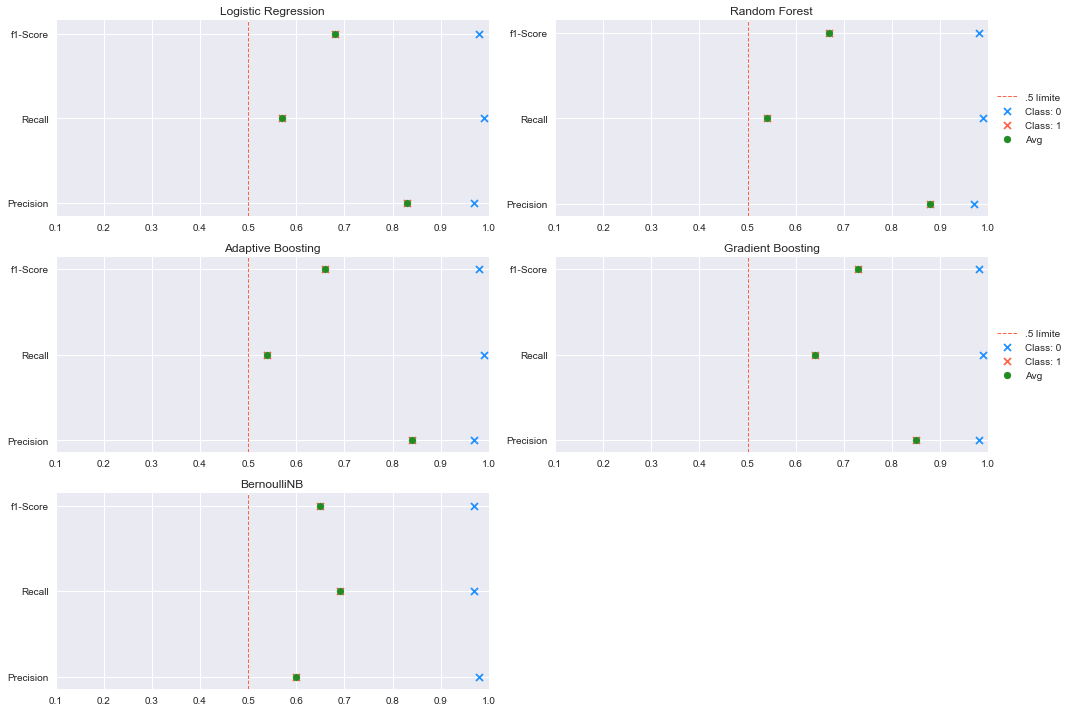

In [40]:
estimators = [('Logistic Regression',log_hat),
              ('Random Forest', y_hat_rf),
              ('Adaptive Boosting',y_hat_ab),
              ('Gradient Boosting',y_hat_gb),
              ('BernoulliNB',ber_class_pred)           
              #('Decision Tree Classifier max_deph=4',DecisionTreeClassifier(max_depth=4, random_state=1234))
             ]
plt.figure(figsize=(15,10))
for index, value in enumerate(estimators):
    plt.subplot(3, np.ceil(len(estimators)/3), index + 1)
    plt.title(value[0])
    plot_classification_report(y_test, value[1])
    # Agregamos el benchmark global
    plt.axvline(.5, color='tomato', linestyle='--', lw=1, label=".5 límite")
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

Regresión Logística y BernoulliNB son muy buenas opción para obtener modelos de clasificación para vectores objetivos binarios, son métodos simples y rápidos. GRadient Boosting es el modelo que presenta mejor desempeño respecto de los modelos generados, pero también es uno de los que toma mayor tiempo de procesamiento.
En general los modelos obtenidos se pueden considerar buenos ya que son mejores que un predictor aleatorio consiiderando incluso el desbalance de clases. Si se quisiera mejorar el desempeño de las predicciónd e la clase 1 se necesitan más datos.

Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.83      0.57      0.68       309

    accuracy                           0.96      4747
   macro avg       0.90      0.78      0.83      4747
weighted avg       0.96      0.96      0.96      4747

Random Forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4438
           1       0.88      0.54      0.67       309

    accuracy                           0.97      4747
   macro avg       0.93      0.77      0.83      4747
weighted avg       0.96      0.97      0.96      4747

Gradient Boosting
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.85      0.63      0.73       309

    accuracy                           0.97      4747
   macro avg       0.91      0.81      0.86      4747
weighted avg       0.9

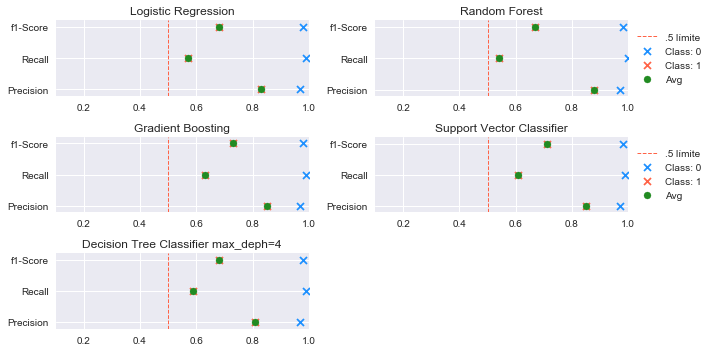

In [41]:
#Voy a considerar los mejores dos modelos Regresión Logística y Gradient Boosting y agregar un 3er modelo DecisionTree
from sklearn.tree import DecisionTreeClassifier
estimators2 = [('Logistic Regression',LogisticRegression(random_state=1234)),
               ('Random Forest',RandomForestClassifier(n_estimators=920, random_state=1234)),
                ('Gradient Boosting',GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 500)),
               ('Support Vector Classifier', SVC(kernel='linear',random_state=1234)),
              ('Decision Tree Classifier max_deph=4',DecisionTreeClassifier(max_depth=4, random_state=1234))]
plt.figure(figsize=(10,5))
for index, value in enumerate(estimators2):
    class_pred = value[1].fit(X_train, y_train).predict(X_test)
    print(value[0])
    print(classification_report(y_test, class_pred))
    plt.subplot(3, np.ceil(len(estimators2)/3), index + 1)
    plt.title(value[0])
    plot_classification_report(y_test, class_pred)
    # Agregamos el benchmark global
    plt.axvline(.5, color='tomato', linestyle='--', lw=1, label=".5 límite")
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

Nuevamente Gradientd Boosting es el que presenta mejor desempeño

In [42]:
#vamos a considerar una clasificador de votación entre los anteriores
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators2).fit(X_train, y_train)
modelo=voting_classifier.fit(X_train, y_train)
y_hat=modelo.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.87      0.62      0.72       309

    accuracy                           0.97      4747
   macro avg       0.92      0.81      0.85      4747
weighted avg       0.97      0.97      0.97      4747



El nuevo modelo obtenido si bien presente f1 similares a Gradient Boosting, mejora en precision para la clase 1

Encuentre por lo menos 30 atributos que explique la importancia relativa y ordénelos por orden de importancia.

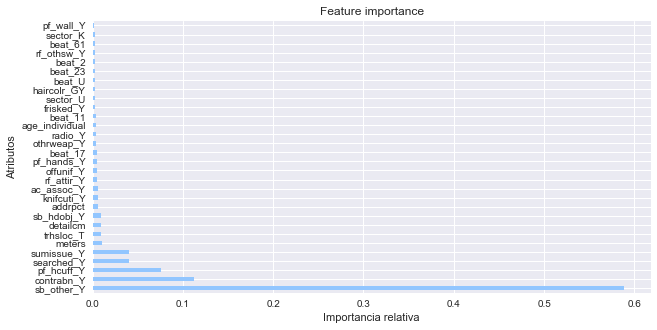

In [43]:
# Consideraremos el modelo de gradient boorsting para analizar que variables influyen más en el vector objetivo
feature_importance = gb_grid.best_estimator_.feature_importances_
#print (modelo.feature_importances_)
feat_importances = pd.Series(gb_grid.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.nlargest(30)
plt.title("Feature importance")
feat_importances.plot(kind='barh' , figsize=(10,5))
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

Se puede apreciar que si el procedimiento es Yes para sumissue, searched, pf_hcuff, contrabn y sb_other las probabilidades de que termine en un arresto son mayores.

Finalmente, reporte la probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y condicional a la raza.


In [44]:
test_y_prob = gb_grid.best_estimator_.predict_proba(X_test)
# probabilidades arresto =1
test_y_prob = [p[1] for p in test_y_prob]
df_proba=df_test
df_proba['test_y_prob'] = test_y_prob
#Para cada barrio
barrios=df_proba['city'].unique()
for i in barrios:
    print(i)

MANHATTAN
BRONX
QUEENS
BROOKLYN
STATEN IS


In [45]:
for i in barrios:
    print(df_proba[df_proba['city']==i].groupby(['city','race','sex'])['test_y_prob'].mean().sort_values(ascending=False))

city       race  sex
MANHATTAN  I     M      0.826532
           P     F      0.249238
           W     F      0.225662
           B     F      0.162796
           P     Z      0.136677
           Q     M      0.096484
           W     M      0.095922
           Z     Z      0.088411
           B     M      0.086942
           Q     F      0.073617
           P     M      0.073066
           A     M      0.061786
           W     Z      0.036965
           A     F      0.029789
           U     M      0.018595
                 F      0.017867
           Z     M      0.017674
           Q     Z      0.016321
           Z     F      0.016153
           B     Z      0.015835
Name: test_y_prob, dtype: float64
city   race  sex
BRONX  B     F      0.201320
       W     F      0.187782
       Z     M      0.138730
       W     M      0.070272
       P     F      0.063036
       Z     Z      0.061465
       A     M      0.060746
       B     M      0.060272
       Q     M      0.052757
       

Las mayores probabilidades de arresto sujeto a raza y sexo se dan en Manhatan para un individuo de raza I y sexo  M tiene (probabilidad de  0.828245) y en Staten Island para raza Z  y sexo Z (probabilidad de 0,42)

### Modelo (Physical_force o Violencia)

En este caso se pide 1 modelo que prediga si un determinado procedimiento concluirá en una acción violenta o no.

Los hiperparámetros del modelo serán calibrados mediante búsqueda de grilla con validaciones cruzadas (GridSeachCV) considerándo parámetros utilizados en los desafíos del curso.


0    0.754961
1    0.245039
Name: physical_force, dtype: float64


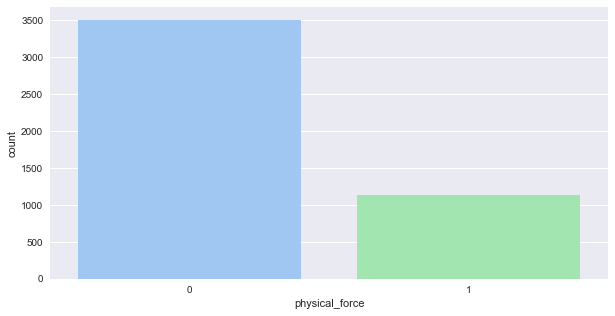

In [46]:
#revisemos nuevamente nuestroo objetivo
plt.figure(figsize=(10, 5))
print(df2['physical_force'].value_counts("%"))
sns.countplot(df2['physical_force'])

Se puede apreciar que los clasificadores de la clase 1 pueden resultar con metricas de desepeño bajas debido al desbalance de clases

In [47]:
y2_train=df2['physical_force']
X2_train=df2.drop(columns='physical_force')
y2_test=df2t['physical_force']
X2_test=df2t.drop(columns='physical_force')

In [48]:
#Random Forest n_estimators = range(20, 1000, 50) max_features="auto"
from sklearn.model_selection import RandomizedSearchCV
start = time.time()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1000, num = 50)]
max_features = ["auto"]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               }
rf = RandomForestClassifier()
rf_random2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, random_state=1234, n_jobs = -1).fit(X2_train, y2_train)
end = time.time()
y_hat_rf2 = rf_random2.predict(X2_test)
print("tiempo de procesamiento: ", end-start)
print(rf_random2.best_params_)
print(classification_report(y2_test, y_hat_rf2))

tiempo de procesamiento:  69.32751369476318
{'n_estimators': 760, 'max_features': 'auto'}
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      3639
           1       0.62      0.20      0.30      1108

    accuracy                           0.78      4747
   macro avg       0.71      0.58      0.58      4747
weighted avg       0.76      0.78      0.74      4747



In [49]:
#Adaptive Boosting
start = time.time()
param_grid_ab = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]} 
ab_grid2 = GridSearchCV(AdaBoostClassifier(),param_grid = param_grid_ab,n_jobs=-1).fit(X2_train, y2_train)#se demoraba mucho asiq quite las validaciones cruzadas
end = time.time()
y_hat_ab2 = ab_grid2.best_estimator_.predict(X2_test)
print("tiempo de procesamiento: ", end-start)
print(ab_grid.best_params_)
print(classification_report(y2_test, y_hat_ab2))

tiempo de procesamiento:  206.2338843345642
{'learning_rate': 0.1, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3639
           1       0.53      0.41      0.46      1108

    accuracy                           0.78      4747
   macro avg       0.68      0.65      0.66      4747
weighted avg       0.76      0.78      0.77      4747



In [50]:
#Gradient Boosting
start = time.time()
param_grid_gb = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]} 
gb_grid2 = GridSearchCV(GradientBoostingClassifier(),param_grid = param_grid_gb,n_jobs=-1).fit(X2_train, y2_train)
end = time.time()
y_hat_gb2 = gb_grid2.best_estimator_.predict(X2_test)
print("tiempo de procesamiento: ", end-start)
print(gb_grid2.best_params_)
print(classification_report(y2_test, y_hat_gb2))

tiempo de procesamiento:  217.6159918308258
{'learning_rate': 0.1, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3639
           1       0.58      0.30      0.40      1108

    accuracy                           0.79      4747
   macro avg       0.70      0.62      0.63      4747
weighted avg       0.76      0.79      0.76      4747



In [51]:
modeloMM = MultinomialNB().fit(X2_train, y2_train)
y_mm=modeloMM.predict(X2_test)
print(classification_report(y2_test, y_mm))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      3639
           1       0.44      0.54      0.49      1108

    accuracy                           0.74      4747
   macro avg       0.65      0.67      0.65      4747
weighted avg       0.76      0.74      0.74      4747



Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3639
           1       0.52      0.34      0.41      1108

    accuracy                           0.77      4747
   macro avg       0.67      0.62      0.63      4747
weighted avg       0.75      0.77      0.75      4747

Random Forest
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3639
           1       0.49      0.22      0.31      1108

    accuracy                           0.76      4747
   macro avg       0.64      0.58      0.58      4747
weighted avg       0.73      0.76      0.73      4747

Gradient Boosting
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3639
           1       0.58      0.30      0.39      1108

    accuracy                           0.79      4747
   macro avg       0.70      0.62      0.63      4747
weighted avg       0.7

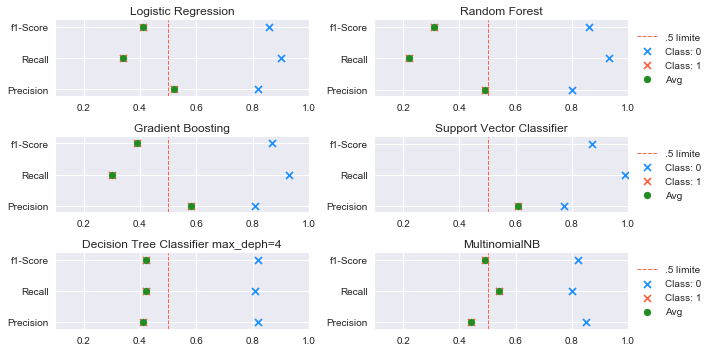

In [52]:
estimators3 = [('Logistic Regression',LogisticRegression(random_state=1234)),
               ('Random Forest',RandomForestClassifier(random_state=1234)),
                ('Gradient Boosting',GradientBoostingClassifier(random_state=1234)),
               ('Support Vector Classifier', SVC(random_state=1234)),
              ('Decision Tree Classifier max_deph=4',DecisionTreeClassifier(random_state=1234)),
              ('MultinomialNB',MultinomialNB())]
plt.figure(figsize=(10,5))
for index, value in enumerate(estimators3):
    class_pred2 = value[1].fit(X2_train, y2_train).predict(X2_test)
    print(value[0])
    print(classification_report(y2_test, class_pred2))
    plt.subplot(3, np.ceil(len(estimators3)/3), index + 1)
    plt.title(value[0])
    plot_classification_report(y2_test, class_pred2)
    # Agregamos el benchmark global
    plt.axvline(.5, color='tomato', linestyle='--', lw=1, label=".5 límite")
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

En general resultaron malos modelos para predecir la clase 1, pero buenos para la clase 0 con F1 sobre 0.8.
Debido a que MultinomialNB tuvo mejor resultado para la clase 1, voy a generar un nuevo modelo con redes neuronales a ver si obtengo algo mejor Multinomial, y seleccionaré el mejor modelo entre ambos.

Veamos algunaa fundiones de clases para utilizar

In [53]:
def ann_neurons_number(X_train=X_train, y_train=y_train, X_test = None, y_test= None, n_neurons=12):
    """
    ann_neurons_number: train a neural net with n defined neurons
    """
    # Set sequential canvas
    tmp_model = Sequential()
    # add a fully connected layer
    tmp_model.add(
        # with user defined neurons
        Dense(n_neurons,
            # input layer
            input_dim = X_train.shape[1],
            # weights are randomly initialized following glorot normal
            kernel_initializer = 'glorot_normal',
            # weighted sum is relu activated
            activation='relu',
            name = 'hidden1')
    )
    # add a fully connected layer
    tmp_model.add(
    # with 1 neuron and glorot normal initialization
        Dense(1, kernel_initializer='glorot_normal',
            # weighted sum is sigmoid activated
            activation='sigmoid',
            name = 'output')
        )
    # arquitecture is compiled
    tmp_model.compile(
        # following a SGD optimizer
        optimizer = SGD(lr=1),
        # defined loss function is binary crossentropy
        loss='binary_crossentropy',
        # evaluation metric
        metrics=['accuracy']
        )
    # train model
    tmp_model.fit(X_train, y_train,
        epochs=50, batch_size=100,
        verbose=0)
    # return model
    return tmp_model

In [54]:
def ann_number_of_layers(model, X_train,y_train,X_test = None, y_test=None, layers = 1, n_neurons=12):
    """TODO: Docstring for ann_number_of_layers.

    :model: TODO
    :X_train: TODO
    :X_test: TODO
    :y_train: TODO
    :y_test: TODO
    :layers: TODO
    :n_neurons: TODO
    :returns: TODO

    """
    model = Sequential()
    for i in range(layers):
        if i == 0:
            indim = X_train.shape[1]
        else:
            indim = None

        model.add(Dense(n_neurons, input_dim = indim,
                        kernel_initializer = "glorot_normal",
                        activation = "relu", name = "hidden_{}".format(i + 1)))
    model.add(Dense(1, kernel_initializer = "glorot_normal",
                    activation = 'sigmoid', name = "out"))

    model.compile(optimizer = SGD(lr = 1),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

    model.fit(X_train, y_train, epochs = 50, batch_size=100, verbose = 0)

    return model   

In [57]:
from keras.optimizers import SGD
for i in range(1,10):
    tmp_neuron_number = ann_neurons_number(X_train=X2_train,y_train=y2_train, n_neurons=i)
    print("Para #neuronas=",i)
    print("accuracy:",np.mean(tmp_neuron_number.history.history['acc']).round(3))
    print("loss:",np.mean(tmp_neuron_number.history.history['loss']).round(3))

Instructions for updating:
Use tf.cast instead.
Para #neuronas= 1
accuracy: 0.755
loss: 0.558
Para #neuronas= 2
accuracy: 0.755
loss: 3.948
Para #neuronas= 3
accuracy: 0.755
loss: 0.578
Para #neuronas= 4
accuracy: 0.755
loss: 0.561
Para #neuronas= 5
accuracy: 0.755
loss: 3.952
Para #neuronas= 6
accuracy: 0.755
loss: 0.56
Para #neuronas= 7
accuracy: 0.245
loss: 12.032
Para #neuronas= 8
accuracy: 0.755
loss: 3.949
Para #neuronas= 9
accuracy: 0.747
loss: 0.743


In [58]:
for i in range(1,10):
    tmp_layers = ann_number_of_layers("demo2", X_train=X2_train, y_train=y2_train, X_test=X2_test,y_test=y2_test, layers=i, n_neurons=5)
    print("Para #capas=",i)
    print("accuracy:",np.mean(tmp_layers.history.history['acc']).round(3))
    print("loss:",np.mean(tmp_layers.history.history['loss']).round(3))
    
   

Para #capas= 1
accuracy: 0.755
loss: 3.949
Para #capas= 2
accuracy: 0.285
loss: 11.399
Para #capas= 3
accuracy: 0.755
loss: 0.559
Para #capas= 4
accuracy: 0.755
loss: 3.948
Para #capas= 5
accuracy: 0.755
loss: 0.558
Para #capas= 6
accuracy: 0.755
loss: 0.557
Para #capas= 7
accuracy: 0.755
loss: 0.558
Para #capas= 8
accuracy: 0.755
loss: 0.558
Para #capas= 9
accuracy: 0.755
loss: 0.558


Entonces mi red neuronal debiera tener 2 capas y 1 neurona, lo cual tiene sentido dado que es un vector objetivo solamente

In [59]:
print(X2_train.shape, y2_train.shape)

(4636, 189) (4636,)


In [60]:
from keras.callbacks import History
# Build the model
model = Sequential()
# iniciamos el modelo
# Dimensionado en la capa de ingreso
input_dim = X2_train.shape[1]
from keras import regularizers
from keras.constraints import max_norm
# generamos una capa oculta con 1 neuron
model.add(Dense(1,
    # donde ingresan todos los atributos
    input_shape = (input_dim, ),
        kernel_initializer = "glorot_normal",
                    activation = 'sigmoid', name = '1ra_capa'))
model.add(Dense(1, kernel_initializer = "glorot_normal",
                    activation = 'sigmoid', name = "out"))
model.compile(optimizer=Adadelta(),
    loss='binary_crossentropy',
    metrics=['accuracy'])
model.summary()

history_ = History()
X_eval, X3_test, y_eval, y3_test = train_test_split(X2_test, y2_test,test_size=.33,random_state=1234)

history=model.fit(X2_train, y2_train, epochs=50, batch_size=512, verbose = 0, callbacks = [history_], validation_data=(X_eval,y_eval))
results = model.evaluate(X3_test, y3_test)


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1ra_capa (Dense)             (None, 1)                 190       
_________________________________________________________________
out (Dense)                  (None, 1)                 2         
Total params: 192
Trainable params: 192
Non-trainable params: 0
_________________________________________________________________
1567/1567 [==============================] - 0s 52us/step


In [61]:
print(np.mean(model.history.history['acc']))
print(np.mean(model.history.history['loss']))

0.7549611734243381
0.5623300377277591


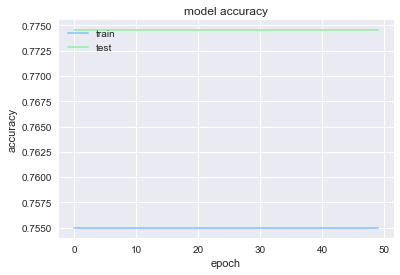

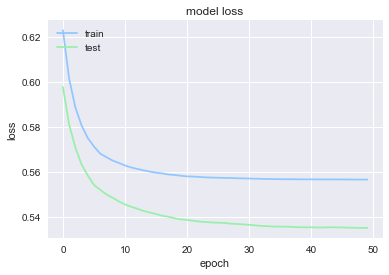

In [62]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Se puede apreciar que el valor de accuracy con la red neuronal es igual muy cercano al obtenido con MultinomialNB, por lo que me quedaré con el modelo Multinomial.

Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados

In [63]:
y_hat=modelo.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.87      0.62      0.72       309

    accuracy                           0.97      4747
   macro avg       0.92      0.81      0.85      4747
weighted avg       0.97      0.97      0.97      4747



In [64]:
pickle.dump([modelo,X_train, X_test, y_train, y_test], open('camilo-pablo-paulina_grupomodelo-1.sav','wb'))

In [65]:
y_mm=modeloMM.predict(X2_test)
print(classification_report(y2_test, y_mm))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      3639
           1       0.44      0.54      0.49      1108

    accuracy                           0.74      4747
   macro avg       0.65      0.67      0.65      4747
weighted avg       0.76      0.74      0.74      4747



In [66]:
pickle.dump([modeloMM,X2_train, X2_test, y2_train, y2_test], open('camilo-pablo-paulina_grupomodelo-2.sav','wb'))